In [ ]:
import numpy as np
%matplotlib inline     
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from helper_simulation import *
from helper_util import *
import pandas as pd
import os
import pyreadr

pc_alpha=0.005
quantile=1
max_id=get_max("exp_result")
exp_str=""
log_path=f"exp_result/{str(max_id)}.Danbube_river"

logger=get_logger(log_path)
path="Data"

## load data

In [9]:
datas=dict()
for file in os.listdir(path):
    if file.endswith(".RData"):
        result = pyreadr.read_r(os.path.join(path, file))
        datas.update(result)
river_data=datas["ComTSs"].set_index('Date')

In [10]:
var_names=[f"$v_{{{i}}}$" for i in range(1,32)]


In [ ]:
import seaborn as sns
g=sns.pairplot(tranform_frechet_df(river_data[[f"X{i}" for i in range(3,7)]]),corner=False)

In [5]:
def draw_graph(edge_shape,save_path=None,**kwargs):
    edge_value=np.ones_like(edge_shape,dtype=float)
    tp.plot_graph(
        val_matrix=edge_value,
        graph=edge_shape,
        cmap_edges =cm1,
        cmap_nodes =cm2,
        link_colorbar_label='TailCorr',
        save_name=save_path,##
        show_colorbar=False,
        **kwargs
        )
    plt.tight_layout(pad=0)
    if save_path is not None:
        
        plt.savefig(save_path,dpi=200,  pad_inches=-30)
    else:
        plt.show()

In [127]:

# 设置缩放因子（根据你的最大坐标灵活选择，比如 100、200）


def draw_tikz(links,name,mode="undirected"):
    x_min=np.min(position_dict["x"])
    y_min=np.min(position_dict["y"])
    x_scale=np.max(position_dict["x"])-x_min    
    y_scale=np.max(position_dict["y"])-y_min



    file_path=os.path.join(log_path,f"{name}.tex")
    with open(file_path,"w") as f:
        # 生成 TikZ 节点代码
        f.write("% Nodes\n")
        for node_id, (x, y) in position_x.items():
            x_scaled = (x-x_min) / x_scale*20
            y_scaled = (1-(y-y_min) / y_scale)*20
            f.write(f"\\node (v{node_id}) at ({x_scaled:.2f}, {y_scaled:.2f}) {{{node_id}}};\n")

        # 生成 TikZ 边代码
        f.write("\n% Edges\n")
        if mode!="ours":
            for a, b in links:
                if mode=="undirected":
                    f.write(f"\\draw[line width=1pt,-] (v{a}) -- (v{b});\n")
                elif mode=="directed":
                    f.write(f"\\draw[line width=1pt,arrows={{-Stealth[scale=0.4]}}] (v{a}) -- (v{b});\n")
        else:
            for a, b,direction,weight,lagged in links:
                if direction=="---":
                    f.write(f"\\draw[line width={weight:.1f}pt,-] (v{a}) -- (v{b});\n")
                else:
                    if lagged==0:
                        f.write(f"\\draw[line width={weight:.1f}pt,arrows={{-Stealth[scale=0.4]}}] (v{a}) -- (v{b});\n")
                    else:
                        f.write(f"\\draw[line width={weight:.1f}pt,arrows={{-Stealth[scale=0.4]}}, bend left=50, draw=red] (v{a}) to (v{b});\n")    

In [118]:
draw_tikz(links_gong,"gong",mode="undirected")
draw_tikz(links_cooley,"lee",mode="undirected")
draw_tikz(links_Enge,"enge",mode="undirected")
draw_tikz(links,"ground_truth",mode="directed")


In [109]:


resultsThisPaper0,results_tail0=method_this_paper(river_data,pc_alpha=pc_alpha,quantile=quantile,tau_min=0,tau_max=0)
print("this is our results")

resultsThisPaper0[resultsThisPaper0=="o-o"]="---"
save_path=os.path.join(log_path,f"resultsThisPaperT0.png")
#draw_graph(resultsThisPaper,node_pos=new_position_dict,figsize=(10,10),node_size=50,arrow_linewidth=5,arrowhead_size=45,curved_radius=1,node_label_size=20,var_names=var_names,save_path=save_path)

this is our results


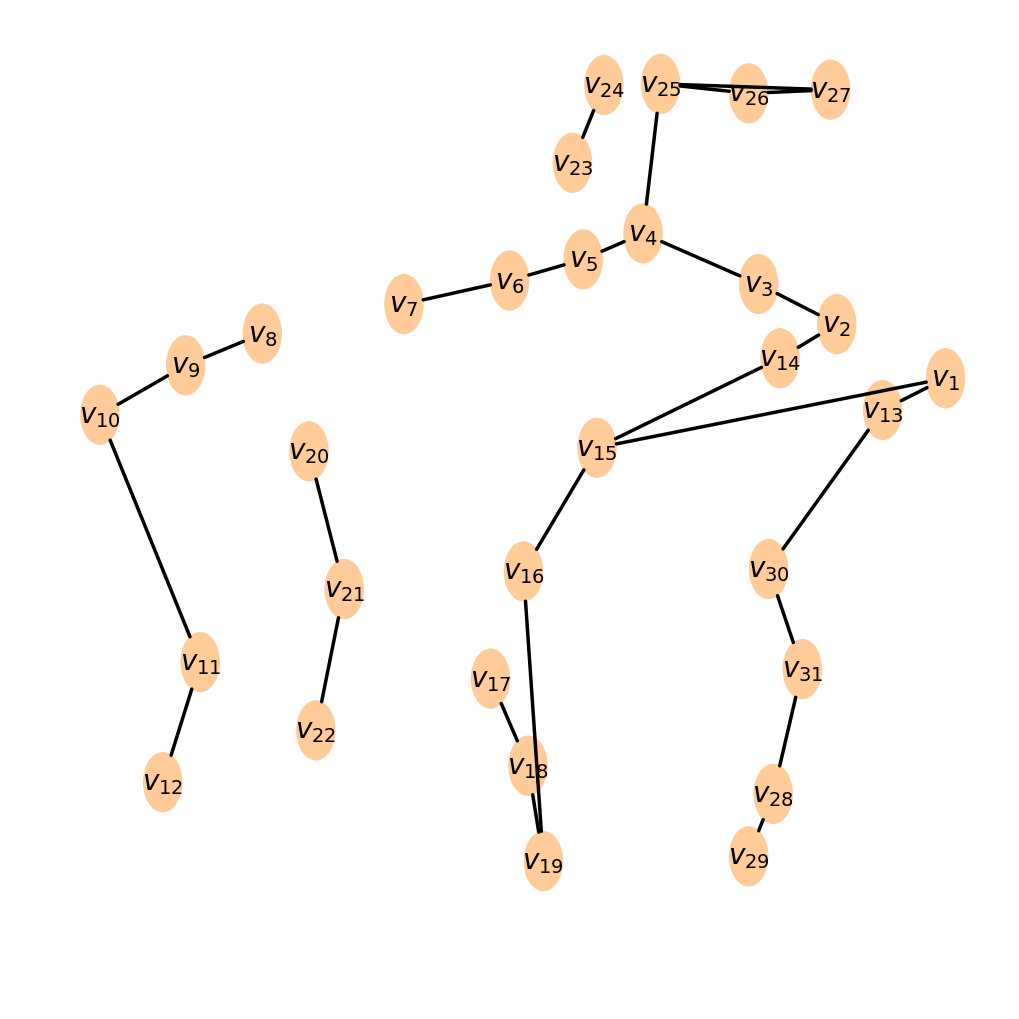

In [110]:
draw_graph(resultsThisPaper0,node_pos=position_dict,figsize=(10,10),node_size=50,arrow_linewidth=5,arrowhead_size=45,curved_radius=1,node_label_size=20,var_names=var_names,save_path=save_path)

In [129]:
values_min=np.min(results_tail0["val_matrix"][resultsThisPaper0!=""]).min()
values_max=np.max(results_tail0["val_matrix"][resultsThisPaper0!=""]).max()
results_tail0["val_matrix"]=((results_tail0["val_matrix"]-values_min)/(values_max-values_min)*(1)+1)
links_ours=[]
for i in range(resultsThisPaper0.shape[0]):
    for j in range(resultsThisPaper0.shape[1]):
        values=results_tail0["val_matrix"][i,j,0]
        if resultsThisPaper0[i,j,0]!="":
            if resultsThisPaper0[i,j,0]=="---":    
                if i>j:
                    links_ours.append((i+1,j+1,"---",values,0))

            if resultsThisPaper0[i,j,0]=="-->":
                links_ours.append((i+1,j+1,"-->",values,0))



draw_tikz(links_ours,"oursT0",mode="ours")


In [112]:


resultsThisPaper1,results_tail1=method_this_paper(river_data,pc_alpha=pc_alpha,quantile=quantile,tau_min=0,tau_max=1)
print("this is our results")


this is our results


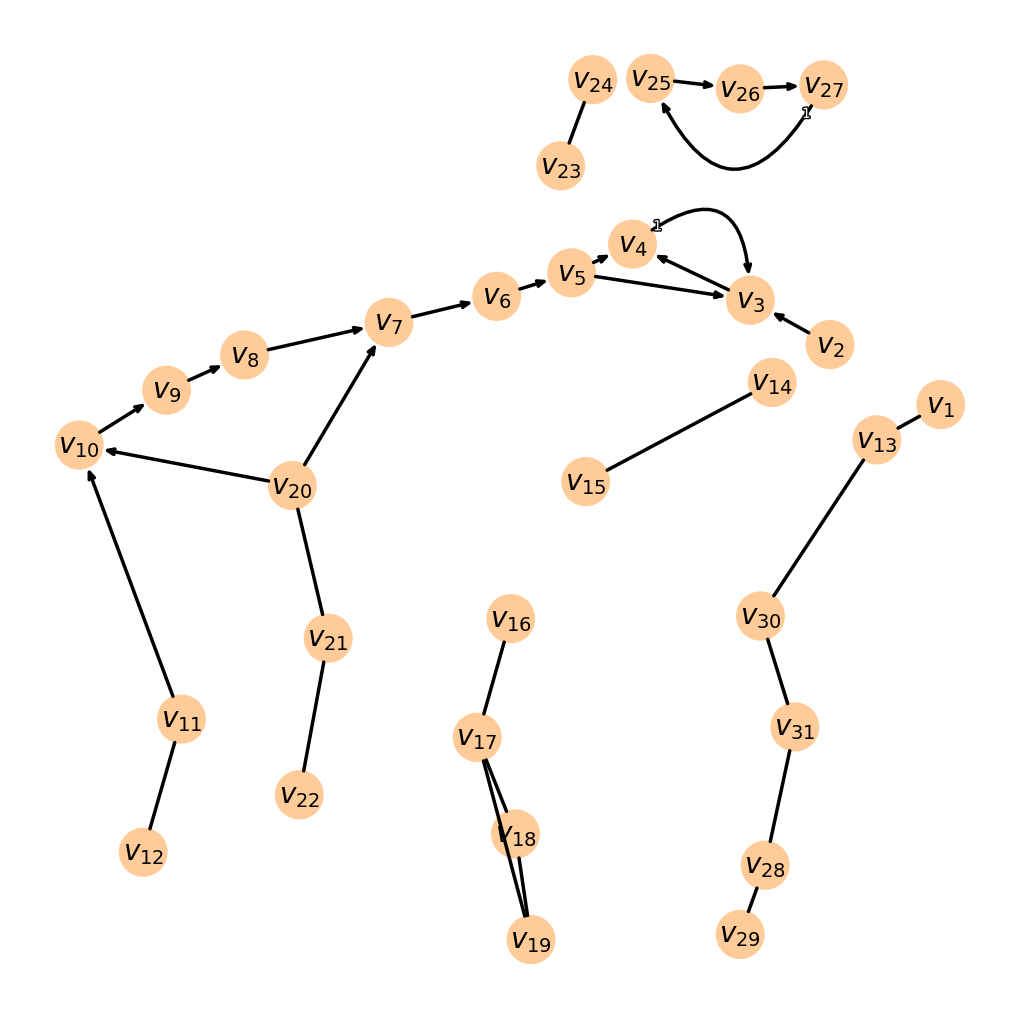

In [113]:
resultsThisPaper1[resultsThisPaper1=="o-o"]="---"
save_path=os.path.join(log_path,f"resultsThisPaperT1.png")
draw_graph(resultsThisPaper1,node_pos=new_position_dict,figsize=(10,10),node_size=50,arrow_linewidth=5,arrowhead_size=45,curved_radius=1,node_label_size=20,var_names=var_names,save_path=save_path)

In [130]:
values_min=np.min(results_tail1["val_matrix"][resultsThisPaper1!=""]).min()
values_max=np.max(results_tail1["val_matrix"][resultsThisPaper1!=""]).max()
results_tail1["val_matrix"]=((results_tail1["val_matrix"]-values_min)/(values_max-values_min)+1)
links_ours=[]
for i in range(resultsThisPaper1.shape[0]):
    for j in range(resultsThisPaper1.shape[1]):
        values=results_tail1["val_matrix"][i,j,0]
        if resultsThisPaper1[i,j,0]!="":
            if resultsThisPaper1[i,j,0]=="---":    
                if i>j:
                    links_ours.append((i+1,j+1,"---",values,0))
            if resultsThisPaper1[i,j,0]=="-->":
                links_ours.append((i+1,j+1,"-->",values,0))


for i in range(resultsThisPaper1.shape[0]):
    for j in range(resultsThisPaper1.shape[1]):
        values=results_tail1["val_matrix"][i,j,1]
        if resultsThisPaper1[i,j,1]!="":

            links_ours.append((i+1,j+1,"-->",values,1))

draw_tikz(links_ours,"oursT1",mode="ours")


Results in other papers [1,2,3]





[1]: Gong, Y., Zhong, P., Opitz, T., & Huser, R. (2024). Partial tail-correlation coefficient applied to extremal-network learning. *Technometrics*, 1–16. Taylor & Francis.

[2]: Lee, J., & Cooley, D. (2022). Partial Tail Correlation for Extremes. *arXiv preprint arXiv:2210.02048*.

[3]: Engelke, S., & Hitz, A. S. (2020). Graphical models for extremes. *Journal of the Royal Statistical Society Series B: Statistical Methodology, 82*(4), 871–932. Oxford University Press.


By Gong et al. [1]
By Cooley and Lee [2]
By Engelke and Hitz [3]
Ground truth


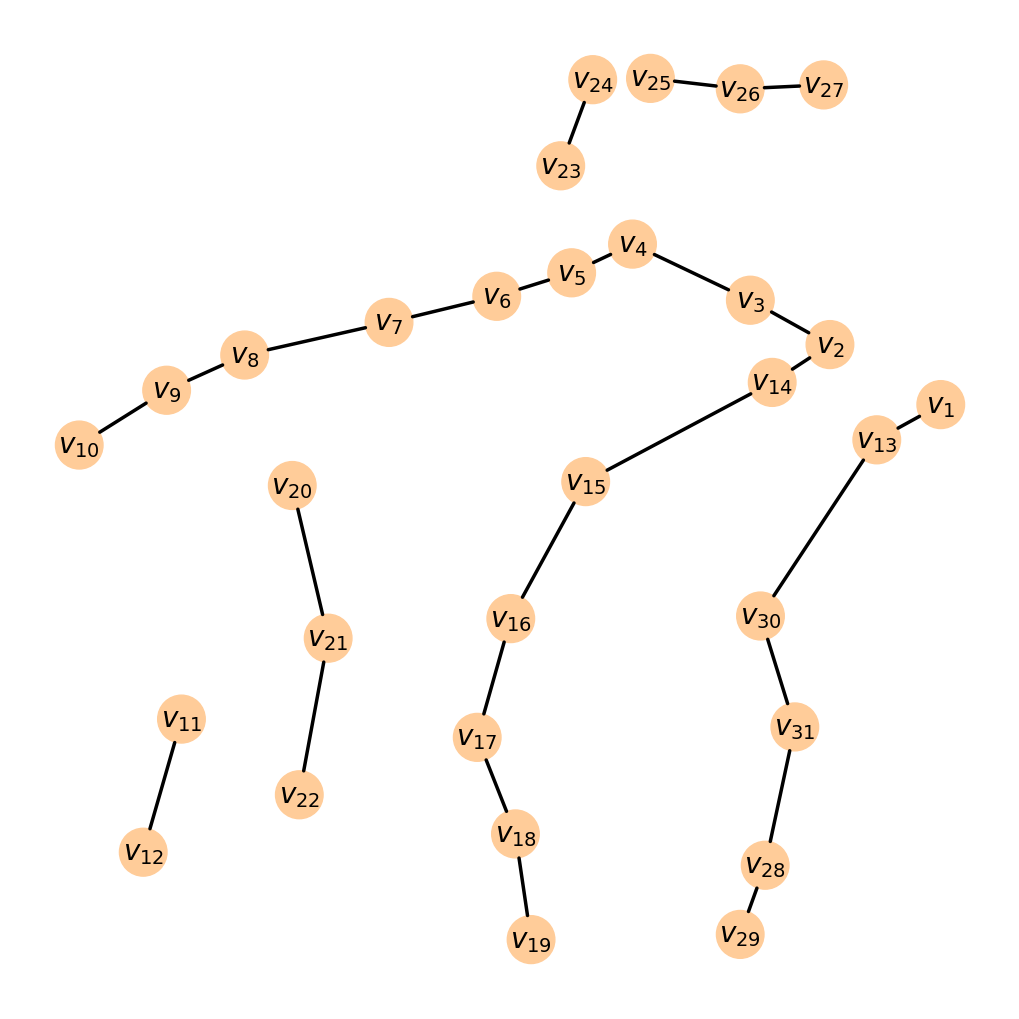

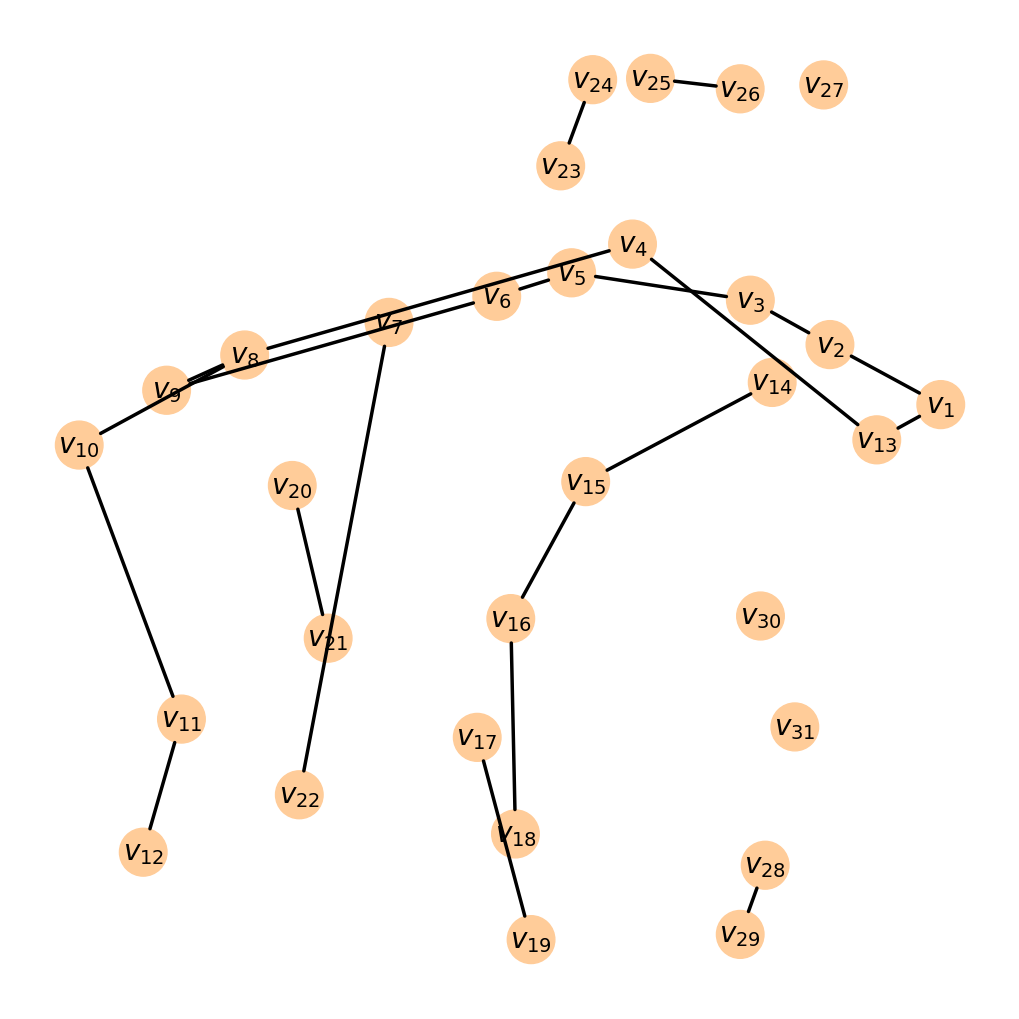

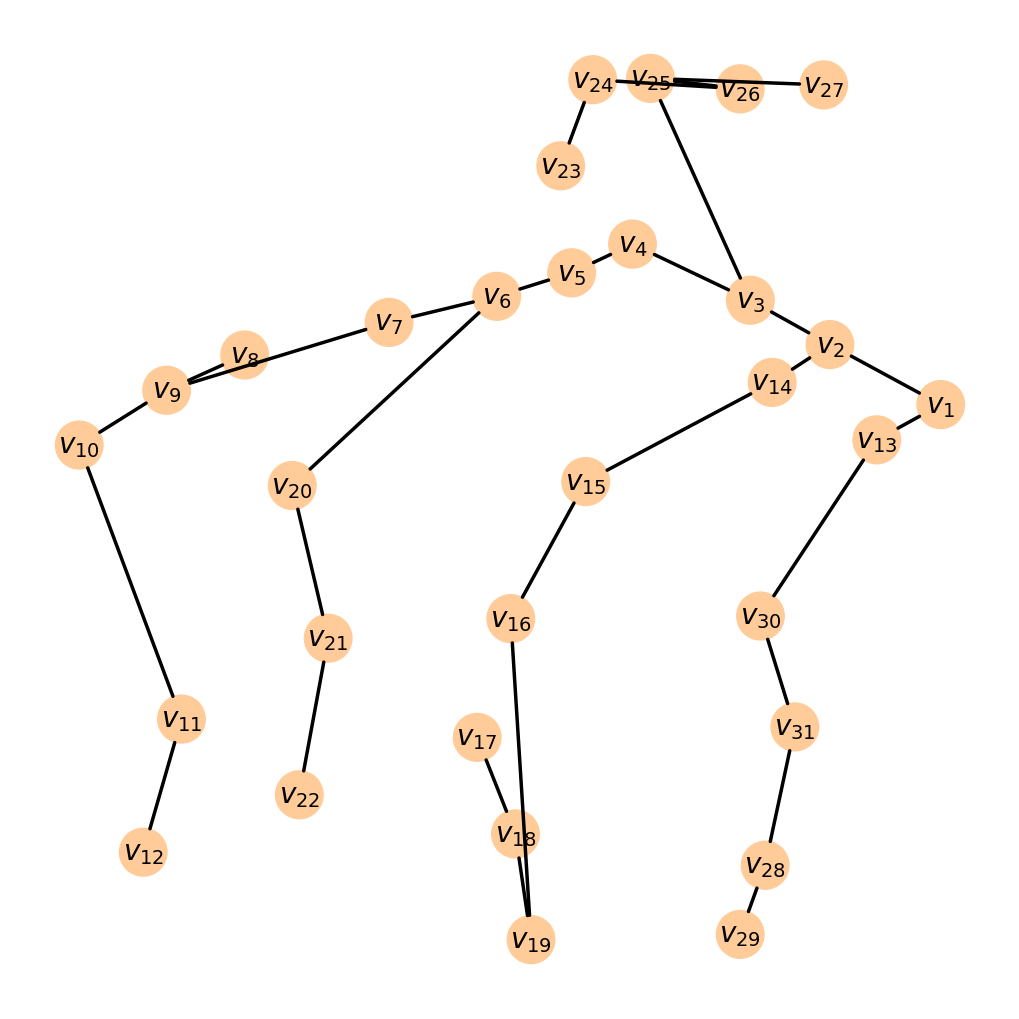

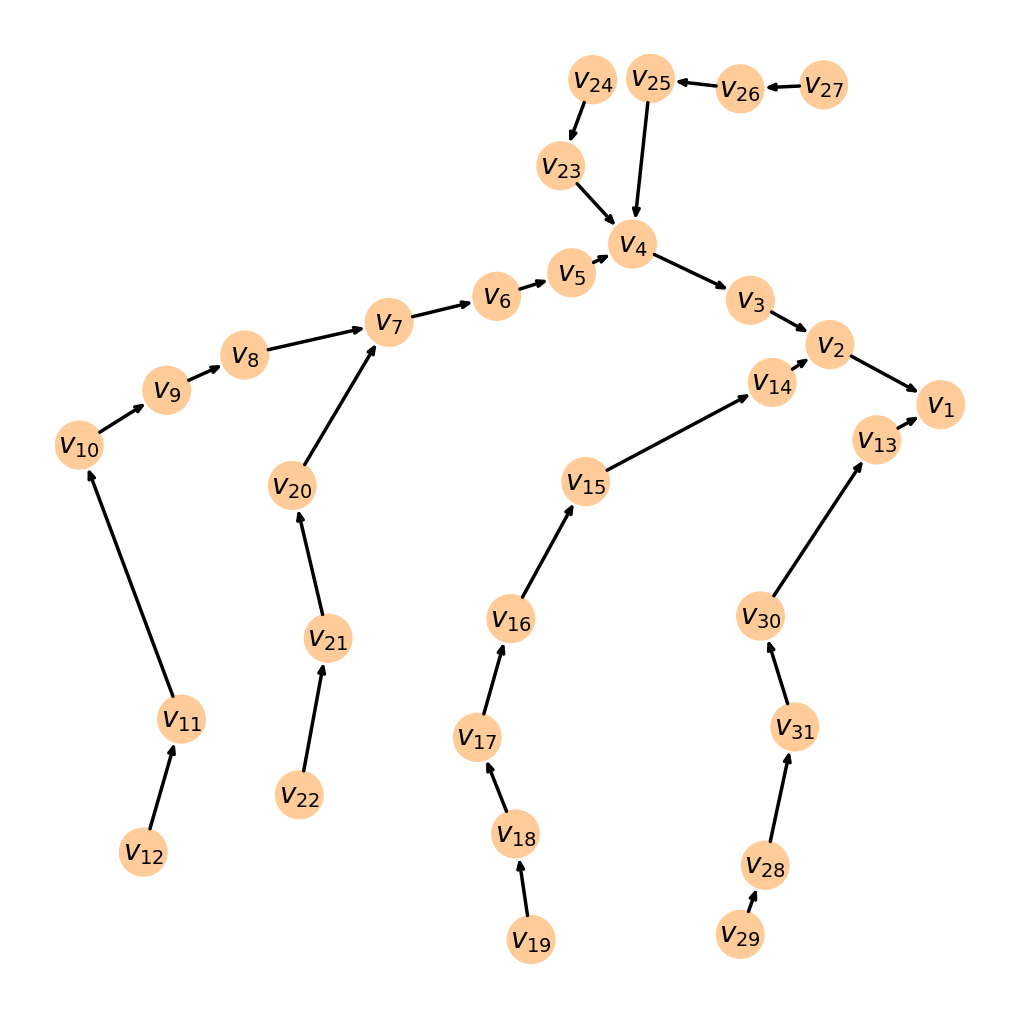

In [104]:
links_gong=link_dict["GONG"]

edge_shape_gong=np.zeros_like(results_tail["graph"])
for start,end in links_gong:
    edge_shape_gong[start-1,end-1,0]="---"
    edge_shape_gong[end-1,start-1,0]="---"

links_cooley=link_dict["COOLEY"]



edge_shape_cooley=np.zeros_like(results_tail["graph"])
for start,end in links_cooley:
    edge_shape_cooley[start-1,end-1,0]="---"
    edge_shape_cooley[end-1,start-1,0]="---"

links_Enge=link_dict["ENGELKE"]



edge_shape_Enge=np.zeros_like(results_tail["graph"])
for start,end in links_Enge:
    edge_shape_Enge[start-1,end-1,0]="---"
    edge_shape_Enge[end-1,start-1,0]="---"


links_ground_truth=link_dict["GROUNDTRUTH"]



edge_shape_ground_truth=np.zeros_like(results_tail["graph"])
for start,end in links_ground_truth:
    edge_shape_ground_truth[start-1,end-1,0]="-->"
    edge_shape_ground_truth[end-1,start-1,0]="<--"



print("By Gong et al. [1]")
save_path=os.path.join(log_path,f"resultsgong.png")
draw_graph(edge_shape_gong,node_pos=new_position_dict,figsize=(10,10),node_size=50,arrow_linewidth=5,arrowhead_size=45,curved_radius=1,node_label_size=20,var_names=var_names,save_path=save_path)

print("By Cooley and Lee [2]")
save_path=os.path.join(log_path,f"resultscooley.png")
draw_graph(edge_shape_cooley,node_pos=new_position_dict,figsize=(10,10),node_size=50,arrow_linewidth=5,arrowhead_size=45,curved_radius=1,node_label_size=20,var_names=var_names,save_path=save_path )

print("By Engelke and Hitz [3]")
save_path=os.path.join(log_path,f"resultsenge.png")
draw_graph(edge_shape_Enge,node_pos=new_position_dict,figsize=(10,10),node_size=50,arrow_linewidth=5,arrowhead_size=45,curved_radius=1,node_label_size=20,var_names=var_names,save_path=save_path)

print("Ground truth")
save_path=os.path.join(log_path,f"ground_truth.png")
draw_graph(edge_shape_ground_truth,node_pos=new_position_dict,figsize=(10,10),node_size=50,arrow_linewidth=5,arrowhead_size=45,curved_radius=1,node_label_size=20,var_names=var_names,save_path=save_path)
